# Exploratory Data Analysis

The purpose of our EDA is to fully understand the relevance of all features and how they impact one another and, most importantly, customer default.

# 1. Load Data

In [1]:
# ensures all output is printed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import scipy
from scipy import stats
import seaborn as sns 
from IPython.display import display, HTML


In [3]:
# Load Data
credit = pd.read_csv('default of credit card clients.csv', header =1)
credit_original = pd.read_csv('default of credit card clients.csv', header =1)




In [4]:
# First five rows
credit.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# What columns are hidden in the ellipsis between Pay_4 and Bill_AMT 4?
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# 2. Identify Variables

## 2A) Describe Variables: 

In [6]:
# Describe variables
credit.describe(include ='all')


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# Describe variables Pay_0 through PAY-6. These columns do not appear when using describe() on entire dataframe 
credit[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [8]:
# Describe variables BILL_AMT1 through BILL_AMT6. These columns do not appear when using describe() on entire dataframe 
credit[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


## 2B) Identify Variables:
### Predictor Variables

<b>Identifier</b>
- ID
- Drop variable as it is insignificant to our analysis. 
- There are 30,000 identifiers for customers in our dataset.

<b>Loan Limit Balance</b>
- Loan Amount in NT dollars
- continuous
- IQR test shows that amounts greater than 240,000 and less than 50,000 are outliers.
- Mean is at 167,484.32. 
- Standard deviation is 129,747.66 . This is big value for variance. The loans are from as low as 10,000 to as high as 1,000,000. We will need to use binning on this variable. 
- Rename variable name from LIMIT_BAL to limit

<b>Sex</b>
- customer sex
- categorical
- Needs to be converted into categorical variable type
- Rename variable from SEX to sex
- 1 = male, 2= female

<b>Education </b> 
- Education level
- categorical ordinal
- Needs to be converted into categorical variable type 
- Per the documentation, we don't know what 0,4,5, or 6 refers to so we will need to bin 0,4,5,6 into one group. We will refer to this group as 4 (4 = other). <span style="color:red"> We can try models without binning later on if  we need to improve accuracy rate</span>
- Rename variable from EDUCATION to edu. 
- 1 = graduate school, 2 = university, 3 = high school, 0,4, 5, 6 = others

<b>Marriage</b>
- Marital Status
- categorical 
- Needs to be converted into categorical variable type 
- Rename variable from MARRIAGE to marriage
- 1 = married, 2 = single, 3 = divorce, 0=others

<b> Age </b>
- customer age in years
- continuous 
- Consider binning and changing to categorical ordinal variable type
- Rename variable from AGE to age

<b>PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 </b>
- Past monthly payment records
- Six variables for six payment histories from April 2005 to September 2005
- Categorical 
- Needs to be converted into categorical variable types
- Consider dimension reduction techniques
- Rename variable from Pay_# format to pay#
    - Change PAY_0 to pay1 to avoid confusion
Classes: 
PAY_0 = SEPTEMBER 2005 
PAY_2 = AUGUST 2005
PAY_3 = JULY 2005
PAY_4 = JUNE 2005
PAY_5 = MAY 2005
PAY_6 = APRIL 2005

Key:
-2 = No consumption
-1 = Paid in full
0 = The use of revolving credit
1 = payment delay for one month
2 = payment delay for two months
3 = payment delay for three months
4 = payment delay for four months
5 = payment delay for five months
6 = payment delay for six months
7 = payment delay for seven months
8 = payment delay for eight months
9 = payment delay for nine months and above.

- No values with payment delays for nine months or above in the data

<b>BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 </b>
- Amount on the bill statement
- Six variables for six bills each month from April 2005 to September 2005
- Continuous 
- Consider dimension reduction techniques
- Rename variable from BILL_AMT# format to bill# format
BILL_AMT1 = SEPTEMBER 2005
BILL_AMT2 = AUGUST 2005
BILL_AMT3 = JULY 2005
BILL_AMT4 = JUNE 2005
BILL_AMT5 = MAY 2005
BILL_AMT6 = APRIL 2005

<b>PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6</b>
- Amount of the previous payment <span style ="color:red"> this is confusing. not sure what this variable represents </span>
- Six variables for each month of payment from April 2005 to September 2005
- Continuous
- Rename variable from PAY_AMT# format to paid#
- COnsider dimension reduction techniques
PAY_AMT1 = SEPTEMBER 2005
PAY_AMT2 = AUGUST 2005
PAY_AMT3 = JULY 2005
PAY_AMT4 = JUNE 2005
PAY_AMT5 = MAY 2005
PAY_AMT6 = APRIL 2005

<span style="color:red"> If we need to reduce the number of predictors, we can consider combining PAY_AMT1 and BILL_AMT1 into variable, and likewise for the remaining monthly variables.  </span>

### Target Variable: 'default payment next month' 
- Variable we want to predict
- Categorical
- Needs to be converted into categorical variable type 
- Rename variable to 'default' 
0 = did not default
1 = did default

<span style="color:red"> How would turning our target variable into a boolean affect our algorithms?  </span>

## 2C) Clean Up Data 

### 2C.1)  Drop Columns:

In [9]:
# Remove Identifier Column
#credit = credit.drop(['ID'],axis=1)
# I discovered that the identifier column is helpful in reshaping and transposing data and therefore, have commented it out


### 2C.2) Rename Columns:

In [10]:
# Rename Columns
credit.rename(columns={
 'ID': 'id', 
 'LIMIT_BAL': 'limit', 
 'SEX' : 'sex',
 'EDUCATION' : 'edu',
 'MARRIAGE' : 'marriage',
 'AGE': 'age',
 'PAY_0': 'pay1',
 'PAY_2': 'pay2',
 'PAY_3': 'pay3' ,
 'PAY_4': 'pay4',
 'PAY_5': 'pay5',
 'PAY_6': 'pay6',
 'BILL_AMT1' : 'bill1',
 'BILL_AMT2': 'bill2',
 'BILL_AMT3': 'bill3',
 'BILL_AMT4': 'bill4',
 'BILL_AMT5': 'bill5',
 'BILL_AMT6': 'bill6',
 'PAY_AMT1': 'paid1',
 'PAY_AMT2': 'paid2',
 'PAY_AMT3': 'paid3',
 'PAY_AMT4': 'paid4',
 'PAY_AMT5': 'paid5',
 'PAY_AMT6': 'paid6',
 'default payment next month' : 'default'}, inplace=True)

### 2C.3) Recode Categorical Variables:

In [11]:
# Bin Education column (for all 0,4,5,6 in edu, replace with 4)
credit["edu"].replace({0: 4, 5:4 , 6:4}, inplace=True)

### 2C.4) Convert Categorical Variables that are Numeric Types into Category Types

In [12]:
# Convert categorical variables that are inputted as numeric into categorical types
credit['sex'] = credit.sex.astype('category')
credit['edu'] = credit.edu.astype('category')
credit['marriage'] = credit.marriage.astype('category')
credit['pay1'] = credit.pay1.astype('category')
credit['pay2'] = credit.pay2.astype('category')
credit['pay3'] = credit.pay3.astype('category')
credit['pay4'] = credit.pay4.astype('category')
credit['pay5'] = credit.pay5.astype('category')
credit['pay6'] = credit.pay6.astype('category')
credit['default'] = credit.default.astype('category')

### 2C.5) Review Summary Statistics of Cleaned up Data

In [13]:
# Summary statistics for caterogical types
credit.describe(include ='all')

,id,limit,sex,edu,marriage,age,pay1,pay2,pay3,pay4,...,bill4,bill5,bill6,paid1,paid2,paid3,paid4,paid5,paid6,default
count,30000.000000,30000.000000,30000.0,30000.0,30000.0,30000.000000,30000.0,30000.0,30000.0,30000.0,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.0
unique,NaN,NaN,2.0,4.0,4.0,NaN,11.0,11.0,11.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,2.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,18112.0,14030.0,15964.0,NaN,14737.0,15730.0,15764.0,16455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23364.0
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,NaN,NaN,NaN,NaN,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,NaN
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,NaN,NaN,NaN,NaN,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,NaN
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,NaN
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,NaN
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,NaN
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,NaN


# 3. Univariate Analysis

We will plot all the variables, paying attention for missing values, outliers, distributions, frequency, and class imbalances.

For numerical variables, we will use histograms and boxplots.
For categorical variables, we will use frequency tables and bar charts.  

In [14]:
def iQRTest( variable ):
    Q1 = variable.quantile(0.25)
    Q3 = variable.quantile(0.75)
    IQR = Q3 - Q1
    highOutliers = (IQR*1.5)+Q3
    lowOutliers = (IQR*1.5)-Q1
    return [print('Q1:',Q1, 'Q3:',  Q3, 'IQR:', IQR,'lowOutliers:',lowOutliers,'highOutliers:',highOutliers)]

In [95]:
# only prints last output
InteractiveShell.ast_node_interactivity = "last_expr"

## 3A) Numerical Variables

Limit Balance, Age, Bill Amounts, Payment Amounts

### 3A.1) Limit Balance

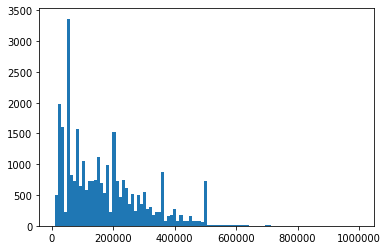

In [16]:
# histogram
plt.hist(credit['limit'], bins=100)
plt.show()

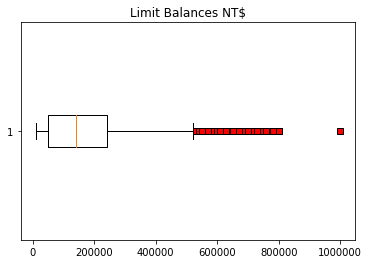

In [17]:
# outliers
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Limit Balances NT$')
_=ax1.boxplot(credit.limit, vert=False, flierprops=red_square)

# source: https://stackoverflow.com/questions/12056115/disable-the-output-of-matplotlib-pyplot

In [18]:
credit.limit.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit, dtype: float64

In [19]:
#IQR
iQRTest(credit.limit)

Q1: 50000.0 Q3: 240000.0 IQR: 190000.0 lowOutliers: 235000.0 highOutliers: 525000.0


[None]

We will remove all loans higher than 500,000 as they are considered outliers. These could be considered as natural outliers and may be better suited in a separate model consisting of only loans in the higher value range. This can be seen in the boxplot and histogram, where most of the loans are in 0 to around 380,000 NT$. I am surprised that loans below 220,000 NT$ are considered outliers too. Eitherway, we won't remove those right now because quite a bit of our data are low value loans. This should change once we remove the high value loans.

If tiem allows, we will consider creating a different model just for natural outliers, like high value loans greater than 500,000. 

### 3A.2) Age

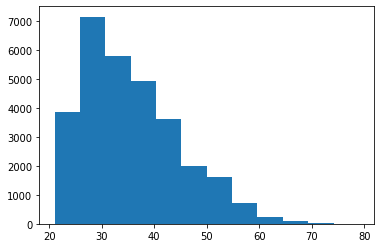

In [20]:
# Histogram of Age
plt.hist(credit['age'], bins=12)
plt.show()

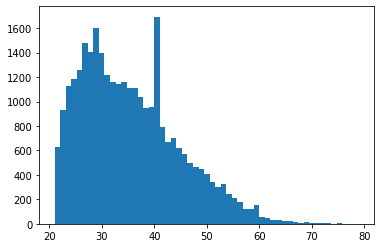

In [21]:
plt.hist(credit['age'], bins=55)
plt.show()

I wonder if there are standard events in people's lives, usually, in their 40s, where they need to take out loans. It makes sense that people in the 20s and early 30s would take out loans (college, graduate school, mortgages) but why in their 40s? 

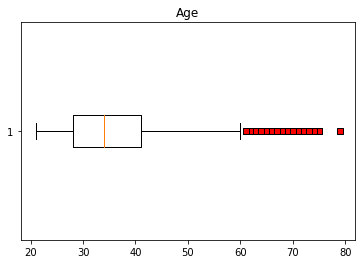

In [22]:
# outliers
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Age')
_=ax1.boxplot(credit.age, vert=False, flierprops=red_square)


In [23]:
# Descriptive Statistics
credit.age.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: age, dtype: float64

In [24]:
#IQR
iQRTest(credit.age)

Q1: 28.0 Q3: 41.0 IQR: 13.0 lowOutliers: -8.5 highOutliers: 60.5


[None]

There are no low outliers since it's not possible to be -8.5 years old. We will consider removing customers older than 60. I am hesitant about removing age. It seems useful. I don't know how useful but I am biased to removing it. I will make a note to remove outliers from age if we need to improve our models, but I will keep it in our for now. 

### 3A.3) Bill Amounts

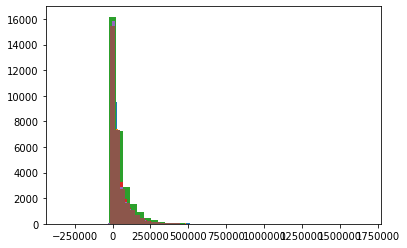

In [25]:
# combined histograms
plt.hist(credit['bill1'], bins = 40)
plt.hist(credit['bill2'], bins = 40)
plt.hist(credit['bill3'], bins = 40)
plt.hist(credit['bill4'], bins = 40)
plt.hist(credit['bill5'], bins = 40)
plt.hist(credit['bill6'], bins = 40)
plt.show()

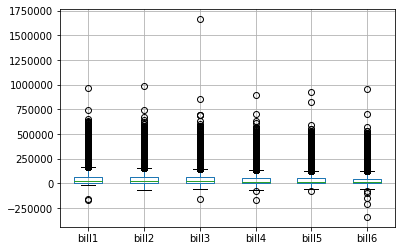

In [26]:
boxplot = credit.boxplot(column=['bill1', 'bill2', 'bill3', 'bill4', 'bill5','bill6'])

Most of our customers bills are not higher than 100,000 $NT. 

Questions:

1. How many of our customers who have loans greater than 500,000 NT$, have bill payments greater than 100,000?
2. How many of our customers who have loans less than 500,000 NT$, have bill payments greater than 100,000?
--> If we remove the 500,000 limit balance outliers, how will that affect our bill payment distributions?

,bill1,bill2,bill3,bill4,bill5,bill6
count,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000
mean,49483.308682,47567.082072,45330.196065,41611.116022,38776.579905,37366.233180
std,68836.537314,66702.228592,64437.339579,59969.836055,56629.781351,55561.055696
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3516.500000,2966.000000,2619.500000,2266.250000,1703.500000,1198.750000
50%,22278.500000,21066.000000,19992.500000,18940.500000,18003.500000,16909.500000
75%,65888.000000,62666.750000,59188.000000,52873.250000,49440.000000,48532.250000
max,626648.000000,743970.000000,855086.000000,628699.000000,547880.000000,699944.000000


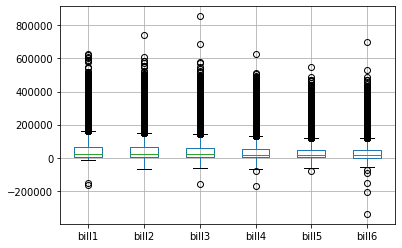

In [27]:
# temporarily remove outliers from limit balance
credit_noLimitOutliers = credit['limit'] < 500000 # boolean variable
credit_noLimitOutliers = credit[credit_noLimitOutliers] # filter for boolean = true
_ = credit_noLimitOutliers.boxplot(column=['bill1', 'bill2', 'bill3', 'bill4', 'bill5','bill6'])
credit_noLimitOutliers[['bill1','bill2','bill3','bill4', 'bill5','bill6']].describe()

Removing customers with loans of 500,000 NT$ or greater reduced the number of bills between 500,000 NT$ and 600,000 NT$. Also, none of the now bills reach the 600,000. I find the relationship between bill payments and loan amounts interesting and will plot that to better understand whether we have a case for creating a separate model for natural outliers consisting of high value loans. 

In [28]:
# Note to self: Replace with for loop when time allows
iQRTest(credit.bill1)
iQRTest(credit.bill2)
iQRTest(credit.bill3)
iQRTest(credit.bill4)
iQRTest(credit.bill5)
iQRTest(credit.bill6)

Q1: 3558.75 Q3: 67091.0 IQR: 63532.25 lowOutliers: 91739.625 highOutliers: 162389.375
Q1: 2984.75 Q3: 64006.25 IQR: 61021.5 lowOutliers: 88547.5 highOutliers: 155538.5
Q1: 2666.25 Q3: 60164.75 IQR: 57498.5 lowOutliers: 83581.5 highOutliers: 146412.5
Q1: 2326.75 Q3: 54506.0 IQR: 52179.25 lowOutliers: 75942.125 highOutliers: 132774.875
Q1: 1763.0 Q3: 50190.5 IQR: 48427.5 lowOutliers: 70878.25 highOutliers: 122831.75
Q1: 1256.0 Q3: 49198.25 IQR: 47942.25 lowOutliers: 70657.375 highOutliers: 121111.625


[None]

The amounts for all the quarter and outliers increase as the bill amount month increases. bill6 is for April. That's when the smallest amounts are due. Bill1 is for September. That has the largest values. As time progresses, customers' bills increase. 

### 3A.4) Payment Amounts

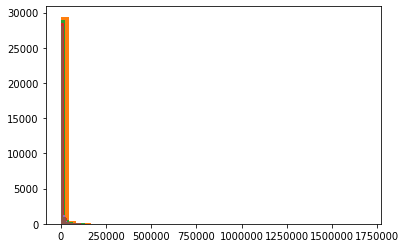

In [29]:
# combined histograms
plt.hist(credit['paid1'], bins = 40)
plt.hist(credit['paid2'], bins = 40)
plt.hist(credit['paid3'], bins = 40)
plt.hist(credit['paid4'], bins = 40)
plt.hist(credit['paid5'], bins = 40)
plt.hist(credit['paid6'], bins = 40)
plt.show()

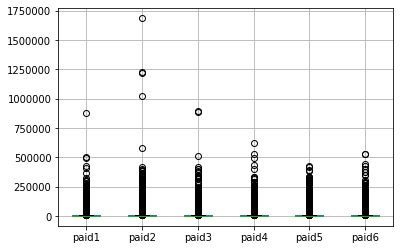

In [30]:
boxplot = credit.boxplot(column=['paid1', 'paid2', 'paid3', 'paid4', 'paid5','paid6'])

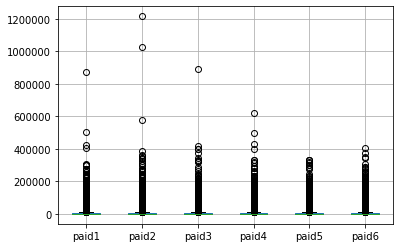

In [31]:
# plot boxplot without high value loan customers
boxplot = credit_noLimitOutliers.boxplot(column=['paid1', 'paid2', 'paid3', 'paid4', 'paid5','paid6'])

I don't ssee a difference between the boxplot with all values and the boxplot with no high value loan customers. Perhaps, these two variables are not correlated. We will explore this further with tests for correlation and tests for variance.

In [32]:
# Note to self: Replace with for loop when time allows
iQRTest(credit.paid1)
iQRTest(credit.paid2)
iQRTest(credit.paid3)
iQRTest(credit.paid4)
iQRTest(credit.paid5)
iQRTest(credit.paid6)

Q1: 1000.0 Q3: 5006.0 IQR: 4006.0 lowOutliers: 5009.0 highOutliers: 11015.0
Q1: 833.0 Q3: 5000.0 IQR: 4167.0 lowOutliers: 5417.5 highOutliers: 11250.5
Q1: 390.0 Q3: 4505.0 IQR: 4115.0 lowOutliers: 5782.5 highOutliers: 10677.5
Q1: 296.0 Q3: 4013.25 IQR: 3717.25 lowOutliers: 5279.875 highOutliers: 9589.125
Q1: 252.5 Q3: 4031.5 IQR: 3779.0 lowOutliers: 5416.0 highOutliers: 9700.0
Q1: 117.75 Q3: 4000.0 IQR: 3882.25 lowOutliers: 5705.625 highOutliers: 9823.375


[None]

In [33]:
credit[['paid1', 'paid2', 'paid3', 'paid4', 'paid5','paid6']].describe()

,paid1,paid2,paid3,paid4,paid5,paid6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


We will consider removing these outliers.They're present even after removing customers with high value loans. Perhaps, some people pay more than usual.
Like bill amount, the values increase every month. I suspect that paid amount and bill amount are highly correlated, which makes sense logically. We may remove bill or paid amount to reduce dimensionality.

## 3B) Categorical Variables

Sex, Education, Marriage, Payment Histories,

In [34]:
InteractiveShell.ast_node_interactivity = "all"

### 3B.1) Sex

In [96]:
# Sex Frequency Table

my_tab = pd.crosstab(index=credit["sex"],  # Make a crosstab
                              columns="Count")      # Name the count column
my_tab_percent = my_tab/my_tab.sum()
my_tab
my_tab_percent 


col_0,Count
sex,
1,0.394503
2,0.605497


In [36]:
# Sex Bar Chart

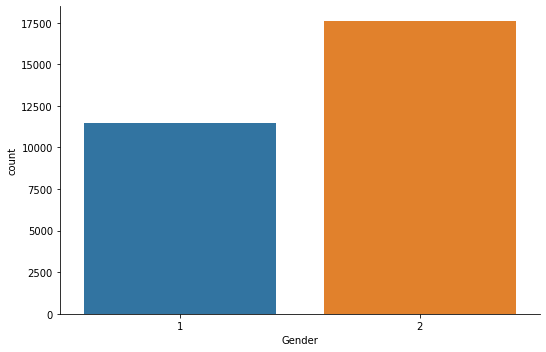

In [97]:
# plot gender count of customers
fg_sex = sns.catplot('sex', data=credit, kind='count', aspect=1.5)
fg_sex.set_xlabels('Gender')


- About 20% more females than males, or a 3:2 imbalance
- Although this is an imbalance, we won't address this because it's not close to a 4:1 ratio (definitely imbalanced), and it's not the dependent variable

### 3B.2) Education

In [98]:
# Education Frequency Table
my_tab = pd.crosstab(index=credit["edu"],  # Make a crosstab
                              columns="edu")      # Name the count column
my_tab_percent = my_tab/my_tab.sum()
my_tab
my_tab_percent 

col_0,edu
edu,
1,0.344834
2,0.473204
3,0.166277
4,0.015685


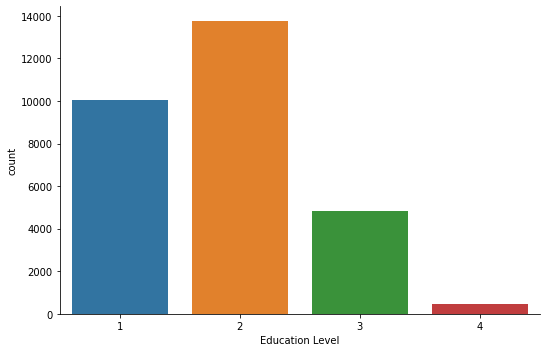

In [99]:
# Education Bar Chart
fg_edu = sns.catplot('edu', data=credit, kind='count', aspect=1.5)
fg_edu.set_xlabels('Education Level')

- There's not a lot of 3s (high school) and minimal 4s (other)
- Most of the customers went to university, the second most went to graduate school
- Furthermore, we don't know what 4s mean. There were initially 6 categories and we condensed 3 of them into one 'other' variable. 

### 3B.3) Marriage

In [40]:
# Marriage Frequency Table
my_tab = pd.crosstab(index=credit["marriage"],  # Make a crosstab
                              columns="marriage")      # Name the count column
my_tab_percent = my_tab/my_tab.sum()
my_tab
my_tab_percent 

col_0,marriage
marriage,
0,54
1,13659
2,15964
3,323


col_0,marriage
marriage,
0,0.001800
1,0.455300
2,0.532133
3,0.010767


In [41]:
# Marriage Bar Chart

fg_edu.set_xlabels('Matiral Status')

Our customers are either 1s (married) or 2s(single). We have very few 3s (divorced) and 0s (other). This an almost 1:1 ratio. 

### 3B.4) Payment Histories

Key: 
 - -2 = No consumption 
 - -1 = Paid in full 
 - 0 = The use of revolving credit 
 - 1 = payment delay for one month 
 - 2 = payment delay for two months 
 - 3 = payment delay for three months 
 - 4 = payment delay for four months 
 - 5 = payment delay for five months 
 - 6 = payment delay for six months 
 - 7 = payment delay for seven months 
 - 8 = payment delay for eight months 
 - 9 = payment delay for nine months and above.

In [42]:
# Payment Histories Frequency Table

pay_hist=credit[['pay1','pay2','pay3','pay4', 'pay5','pay6']]
pay_hist_counts = pay_hist.apply(lambda x: x.value_counts())
pay_hist_counts.describe()
print(pay_hist_counts)

,pay1,pay2,pay3,pay4,pay5,pay6
count,11.000000,11.000000,11.000000,11.000000,10.000000,10.00000
mean,2727.272727,2727.272727,2727.272727,2727.272727,3000.000000,3000.00000
std,4428.640832,4817.261693,4829.932134,5002.169331,5327.973682,5162.17099
min,9.000000,1.000000,3.000000,2.000000,1.000000,2.00000
25%,22.500000,22.500000,22.000000,20.000000,27.250000,25.75000
50%,322.000000,99.000000,76.000000,69.000000,131.000000,116.50000
75%,3223.500000,3854.500000,3952.000000,3753.500000,4066.000000,4362.75000
max,14737.000000,15730.000000,15764.000000,16455.000000,16947.000000,16286.00000


     pay1   pay2   pay3   pay4     pay5     pay6
-2   2759   3782   4085   4348   4546.0   4895.0
-1   5686   6050   5938   5687   5539.0   5740.0
 0  14737  15730  15764  16455  16947.0  16286.0
 1   3688     28      4      2      NaN      NaN
 2   2667   3927   3819   3159   2626.0   2766.0
 3    322    326    240    180    178.0    184.0
 4     76     99     76     69     84.0     49.0
 5     26     25     21     35     17.0     13.0
 6     11     12     23      5      4.0     19.0
 7      9     20     27     58     58.0     46.0
 8     19      1      3      2      1.0      2.0


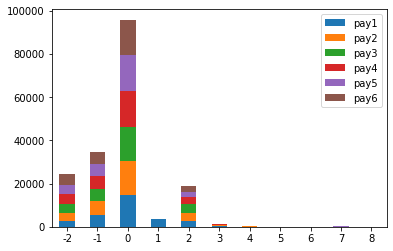

In [43]:
# payment history barchart , payment types stacked by payment month
pay_hist_counts.plot(ax=plt.figure().add_subplot(111),kind='bar',stacked=True,rot=0)

# source: https://stackoverflow.com/questions/50082440/python-stacked-bar-chart-using-categorical-data

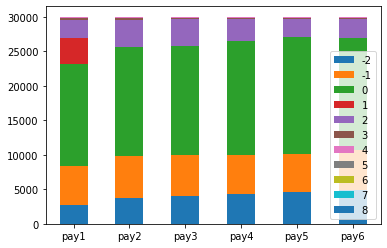

In [44]:
# payment history barchart , payment months stacked by payment types
## note to self: when time allows, figure out how to move legend to the right, after column 6. 
pay_hist_counts.transpose().plot(ax=plt.figure().add_subplot(111),kind='bar',stacked=True,rot=0)

Most of our customers pay with revolving credit, like regular credit cards. Per the documentation, level 9 is for customers who have not paid for 9 months or longer. We have no values equal to 9 in our payment histories columns, yet we have customers who defaulted. As indicated in the intitial presentation, when exactly do customers default? Is it after 9 months? If so, we should have more payment histories so we can visually see this. Likewise, when do they start their loans?

1 refers to a payment delay of 1 month. Why does pay1, or September 2005, have more 1s while the previous months have almost none or none (April and May).

I can't answer why but I will keep these in mind as we build our models. 

### 3B.5) Default

In [45]:
# Default Frequency Table
my_tab = pd.crosstab(index=credit["default"],  # Make a crosstab
                              columns="default")      # Name the count column
my_tab_percent = my_tab/my_tab.sum()
my_tab
my_tab_percent 

col_0,default
default,
0,23364
1,6636


col_0,default
default,
0,0.7788
1,0.2212


In [46]:
# Grouping Default Customers
defaulted = credit[credit['default']==1]
not_defaulted = credit[credit['default']==0]
len(defaulted) # number of defaulted

# Why is this number different?????????????????????

6636

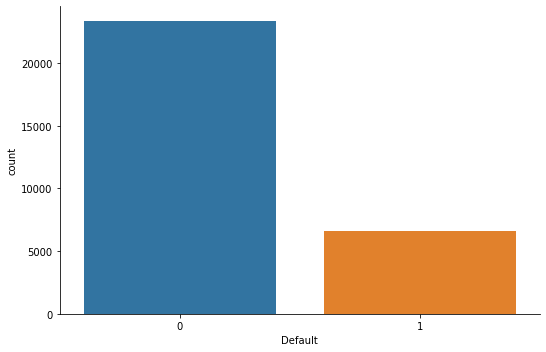

In [47]:
# Default Bar Chartfg_default = sns.catplot('default', data=credit, kind='count', aspect=1.5)
fg_default = sns.catplot('default', data=credit, kind='count', aspect=1.5)
fg_default.set_xlabels('Default')

Most customers did not default. In our dataset, only 22% of our customers defaulted. This is a class imbalance issue, with a ratio of approximately 3.5 to 1, even though it is natural to our dataset. 

### 3C) Remove Outliers based on Univariate Distributions

### Continuous
- Remove limit balances above 500,000
- Consider removing ages above 60 if we need to improve model performance
- Consider removing bill amounts. These are the IQR results for bill amounts (bill1 to bill6):

   - Q1: 3405.0 Q3: 64365.0 IQR: 60960.0 lowOutliers: 88035.0 highOutliers: 155805.0
   - Q1: 2849.0 Q3: 60549.0 IQR: 57700.0 lowOutliers: 83701.0 highOutliers: 147099.0
   - Q1: 2493.0 Q3: 56374.5 IQR: 53881.5 lowOutliers: 78329.25 highOutliers: 137196.75
   - Q1: 2141.5 Q3: 50202.0 IQR: 48060.5 lowOutliers: 69949.25 highOutliers: 122292.75
   - Q1: 1600.5 Q3: 47776.5 IQR: 46176.0 lowOutliers: 67663.5 highOutliers: 117040.5
   - Q1: 1105.0 Q3: 46254.5 IQR: 45149.5 lowOutliers: 66619.25 highOutliers: 113978.75

- Consider removing paid amounts. These are the IQR results for paid amounts (paid1 to paid6):

    - Q1: 892.5 Q3: 5000.0 IQR: 4107.5 lowOutliers: 5268.75 highOutliers: 11161.25
    - Q1: 773.5 Q3: 4900.0 IQR: 4126.5 lowOutliers: 5416.25 highOutliers: 11089.75
    - Q1: 390.0 Q3: 4087.0 IQR: 3697.0 lowOutliers: 5155.5 highOutliers: 9632.5
    - Q1: 240.0 Q3: 3854.0 IQR: 3614.0 lowOutliers: 5181.0 highOutliers: 9275.0
    - Q1: 188.5 Q3: 3861.5 IQR: 3673.0 lowOutliers: 5321.0 highOutliers: 9371.0
    - Q1: 5.0 Q3: 3697.0 IQR: 3692.0 lowOutliers: 5533.0 highOutliers: 9235.0
    
    - After plotting paid amounts vs default, I am more confident removing outliers above 100,000 for this variable.
    
    
### Categorical

I am not touching categorical outiers right now. If we need to improve the model, we will attempt this. 

In [48]:
# Remove Outliers based on Univariate Distributions. 

credit = credit[credit.limit < 500000]

#credit = credit[credit.bill1 < 600000]
#credit = credit[credit.bill2 < 600000]
#credit = credit[credit.bill3 < 600000]
#credit = credit[credit.bill4 < 600000]
#credit = credit[credit.bill5 < 600000]
#credit = credit[credit.bill6 < 600000]

#credit = credit[credit.bill1 > -50000]
#credit = credit[credit.bill2 > -50000]
#credit = credit[credit.bill3 > -50000]
#credit = credit[credit.bill4 > -50000]
#credit = credit[credit.bill5 > -50000]
#credit = credit[credit.bill6 > -50000]

#credit = credit[credit.paid1 < 75000]
#credit = credit[credit.paid2 < 75000]
#credit = credit[credit.paid3 < 75000]
#credit = credit[credit.paid4 < 75000]
#credit = credit[credit.paid5 < 75000]
#credit = credit[credit.paid6 < 75000]


# 3. Dimensionality Reduction

There are just too many variables to explore and visuale all possible relationships. We will reduce this problem by removing and or transforming variables.  

- Multicollinearity
- Near Zero Variance


## 3A) Multicollinearity

In [49]:
corrMat = credit.corr()
print(corrMat)

             id     limit       age     bill1     bill2     bill3     bill4  \
id     1.000000  0.028658  0.019141  0.017924  0.017970  0.025369  0.041918   
limit  0.028658  1.000000  0.125121  0.269081  0.263157  0.266842  0.273968   
age    0.019141  0.125121  1.000000  0.050129  0.047687  0.047781  0.043487   
bill1  0.017924  0.269081  0.050129  1.000000  0.950641  0.901747  0.860763   
bill2  0.017970  0.263157  0.047687  0.950641  1.000000  0.938996  0.894335   
bill3  0.025369  0.266842  0.047781  0.901747  0.938996  1.000000  0.930235   
bill4  0.041918  0.273968  0.043487  0.860763  0.894335  0.930235  1.000000   
bill5  0.015373  0.277098  0.041419  0.832011  0.862642  0.892876  0.941314   
bill6  0.015799  0.269499  0.040115  0.805257  0.834629  0.861115  0.904799   
paid1  0.010853  0.175708  0.017835  0.132651  0.277539  0.237722  0.226802   
paid2  0.015159  0.174317  0.021518  0.113912  0.105269  0.280155  0.212754   
paid3  0.046106  0.183160  0.017748  0.128145  0.120

Bill payments are highly correlated with each other (.80 and higher).
I thought that bill payments and paid amounts would correlate but they don't. 
Paid amounts are also not highly correlated with each other. 
Therefore, we should focus on bill1 through bill6 to reduce dimensionality. 
    - We will visualize bill vs default, and then consider keeping bills, removing bills, or condensing bills into one variable


In [50]:
# Covariance: understand the strength of relationships between any two variables

covMat = credit.cov()
print(covMat)

                 id         limit            age         bill1         bill2  \
id     7.492598e+07  2.843563e+07    1527.458567  1.067973e+07  1.037557e+07   
limit  2.843563e+07  1.314044e+10  132224.360203  2.123275e+09  2.012152e+09   
age    1.527459e+03  1.322244e+05      84.987582  3.181152e+04  2.932363e+04   
bill1  1.067973e+07  2.123275e+09   31811.522891  4.738469e+09  4.364916e+09   
bill2  1.037557e+07  2.012152e+09   29323.634490  4.364916e+09  4.449187e+09   
bill3  1.415029e+07  1.971046e+09   28383.760377  3.999828e+09  4.035913e+09   
bill4  2.175968e+07  1.883376e+09   24041.836726  3.553328e+09  3.577450e+09   
bill5  7.535395e+06  1.798799e+09   21623.408118  3.243345e+09  3.258484e+09   
bill6  7.598333e+06  1.716454e+09   20547.309347  3.079810e+09  3.093175e+09   
paid1  1.468089e+06  3.147686e+08    2569.426102  1.427007e+08  2.893073e+08   
paid2  2.401488e+06  3.657176e+08    3630.679085  1.435126e+08  1.285110e+08   
paid3  6.083327e+06  3.200408e+08    249

In [51]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
#col_to_remove = sel.fit_transform(credit)

selector.fit(credit)
mask = selector.get_support(indices=True)
print(mask)
# Source: https://www.quora.com/How-do-we-know-which-features-are-being-eliminated-while-removing-them-with-the-variance-threshold-method-in-scikit-learn-The-command-sel-fit_transform-just-drops-features-but-doesnt-tell-us-which-features
# Source: https://scikit-learn.org/stable/modules/feature_selection.html

VarianceThreshold(threshold=0.15999999999999998)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


I tried adjusting the variance threshold at several levels from 90% to 50%. There is significant variance in all our predictors. This process is not helpful in dimension reduction. If we binned our continuous monetary variables, perhaps we can discover low variances. For, we will leave this as is and consider this step again if we need to improve our model.

# 4. Multivariate Analysis

## 4A) All Variables vs Target Variable


 - Continuous vs Categorical
     - Limit vs Default
     - Age vs Default
     - Bill vs Default
     - Payment Amount vs Default
     

     

### 4A.1) Continuous Predictors vs Target


#### 4A.1.1) Limit Balance  vs Default

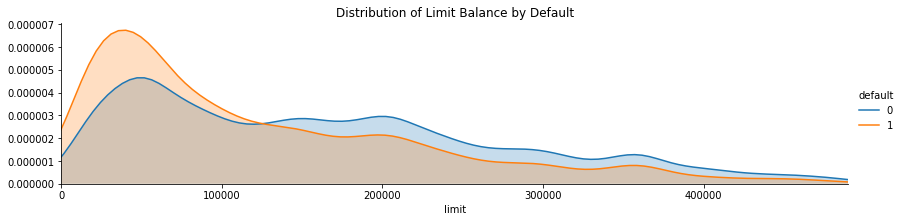

In [52]:
# Limit vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'limit', shade=True)
oldest = credit['limit'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Limit Balance by Default')
fig.add_legend()

#### 4A.1.2) Age   vs Default

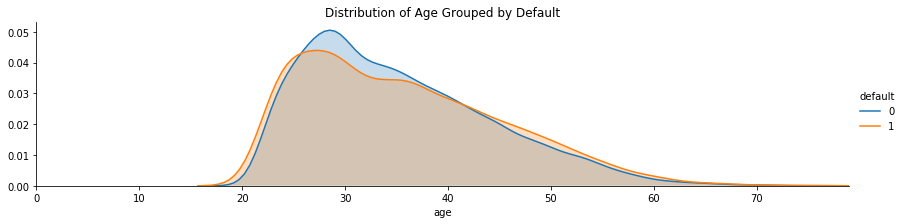

In [53]:
# Age vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = credit['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Default')
fig.add_legend()

It looks like , the older a customer is, the less likely they will default. This still coincides with fewer of our customers being older, or, more of our customers are younger, in the 25-34 age group, specifically. 

ages 25 to late 30s are more likely to not default. This is an interesting visualization because it's easy to speculate that those who are in the late 20s to 30s will default the most, but, they're also the majority of the customer

#### 4A.1.3) Bill Amounts  vs Default

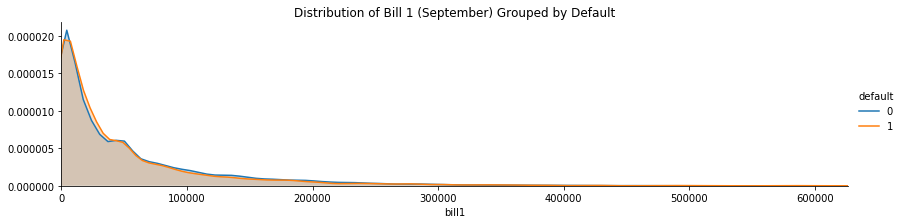

In [76]:
# Bill1 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'bill1', shade=True)
oldest = credit['bill1'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Bill 1 (September) Grouped by Default')
fig.add_legend()

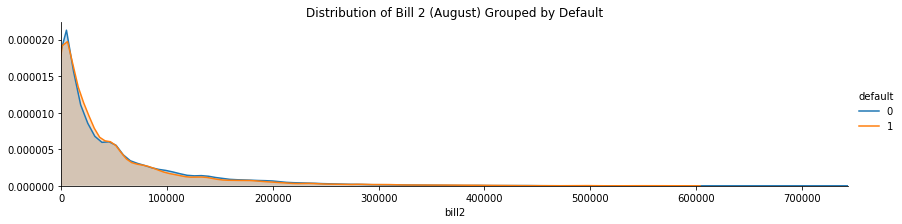

In [77]:
# Bill2 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'bill2', shade=True)
oldest = credit['bill2'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Bill 2 (August) Grouped by Default')
fig.add_legend()

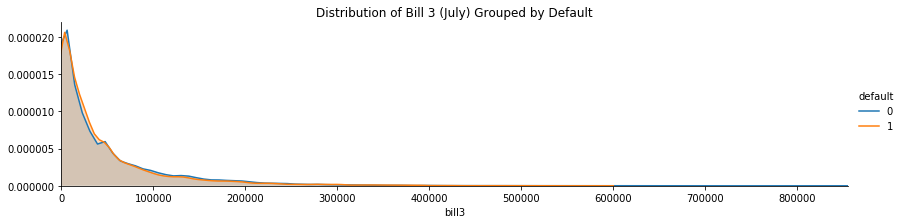

In [78]:
# Bill3 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'bill3', shade=True)
oldest = credit['bill3'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Bill 3 (July) Grouped by Default')
fig.add_legend()

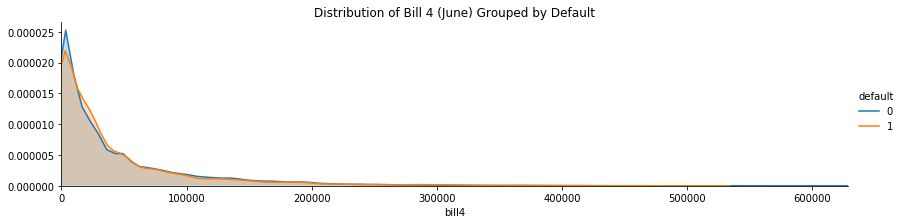

In [79]:
# Bill4 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'bill4', shade=True)
oldest = credit['bill4'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Bill 4 (June) Grouped by Default')
fig.add_legend()

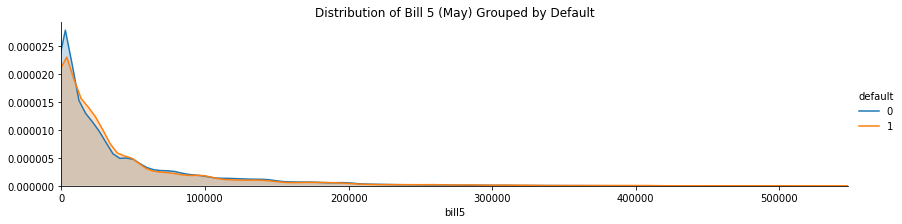

In [80]:
# Bill5 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'bill5', shade=True)
oldest = credit['bill5'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Bill 5 (May) Grouped by Default')
fig.add_legend()

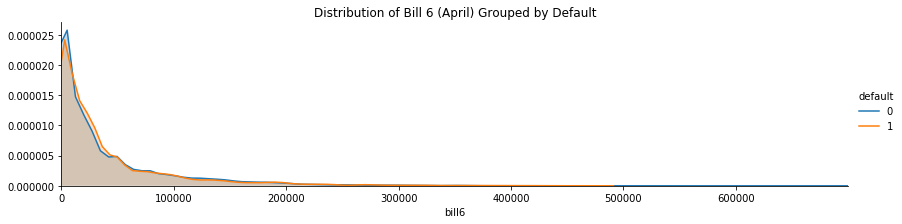

In [81]:
# Bill6 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'bill6', shade=True)
oldest = credit['bill6'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Bill 6 (April) Grouped by Default')
fig.add_legend()

# Temporary Note: There should be a better way to visualize this. 
# Temporary conclusion: no obvious relationship between bill amounts and default status. 
# Asked for help on this. Pending response.
## WIll apply this visualization to payment amount as well. 

In [57]:
# Bill vs Default dataframe
## Ideas: We could bin dollars, and then plot binning in stacked bar charts
## We could do box plots, with shading or two box blots

bills_all=credit[['bill1', 'bill2', 'bill3', 'bill4', 'bill5','bill6']]
bills_all_counts = bills_all.apply(lambda x: x.value_counts())
bills_all_counts.describe()
print(bills_all_counts)

,bill1,bill2,bill3,bill4,bill5,bill6
count,22066.000000,21693.000000,21368.000000,20894.000000,20348.000000,19957.000000
mean,1.317502,1.340156,1.360539,1.391404,1.428740,1.456732
std,13.321433,16.710643,19.379373,21.803166,24.206811,28.050530
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1956.000000,2444.000000,2815.000000,3137.000000,3440.000000,3953.000000


         bill1  bill2  bill3  bill4  bill5  bill6
-339603    NaN    NaN    NaN    NaN    NaN    1.0
-209051    NaN    NaN    NaN    NaN    NaN    1.0
-170000    NaN    NaN    NaN    1.0    NaN    NaN
-165580    1.0    NaN    NaN    NaN    NaN    NaN
-157264    NaN    NaN    1.0    NaN    NaN    NaN
...        ...    ...    ...    ...    ...    ...
 628699    NaN    NaN    NaN    1.0    NaN    NaN
 689643    NaN    NaN    1.0    NaN    NaN    NaN
 699944    NaN    NaN    NaN    NaN    NaN    1.0
 743970    NaN    1.0    NaN    NaN    NaN    NaN
 855086    NaN    NaN    1.0    NaN    NaN    NaN

[77972 rows x 6 columns]


In [59]:
bill_cols = ['bill1', 'bill2', 'bill3', 'bill4', 'bill5','bill6']

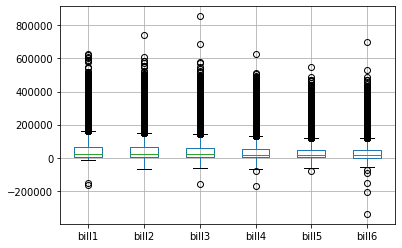

In [60]:
boxplot = credit.boxplot(column=bill_cols)

In [61]:
# make dataframe with bill_month, bill_value, and default
# We're going to need credit, but with the row identifier we dropped already.

#credit_original.melt(id_vars='id', var_name='key', value_name='value')


#data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.


In [62]:
#idx = "id"              # identifier variable
#pd.melt(credit, id_vars=idx, var_name="Desc").sort_values(idx).reset_index(drop=True)

# select id, bill1 to bill6, default

bill_df = credit.loc[:, ['id','default','bill1', 'bill2', 'bill3', 'bill4', 'bill5','bill6']] # elect id, bill1 to bill6, default
bill_df.head()


,id,default,bill1,bill2,bill3,bill4,bill5,bill6
0,1,1,3913,3102,689,0,0,0
1,2,1,2682,1725,2682,3272,3455,3261
2,3,0,29239,14027,13559,14331,14948,15549
3,4,0,46990,48233,49291,28314,28959,29547
4,5,0,8617,5670,35835,20940,19146,19131


In [63]:
# Payment Amount vs Default

bar_val =  ['bill1', 'bill2', 'bill3', 'bill4', 'bill5','bill6']
#bill_df.transpose() #  0 to 10 rows, all money values
#bill_df.pivot(index='id', columns='default', values=['default','bill1', 'bill2', 'bill3', 'bill4', 'bill5','bill6'])

pd.wide_to_long(credit,["billperiod","defaults"], i="id", j=bar_val)



IndexError: Too many levels: Index has only 1 level, not 2

#### 4A.1.4) Monthly Payments  vs Default

In [ ]:
# Pending
## Need to find better way to visualize monthly payments vs default, similar probelmas bill payments vs default

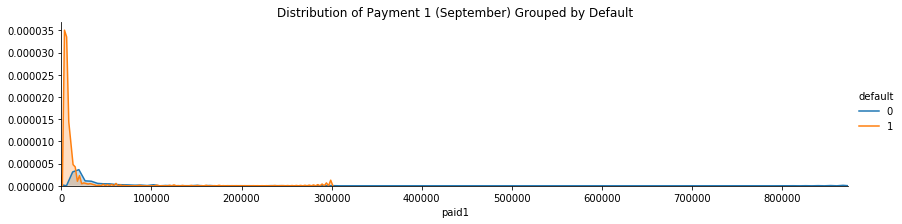

In [84]:
# Payment1 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'paid1', shade=True)
oldest = credit['paid1'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Payment 1 (September) Grouped by Default')
fig.add_legend()

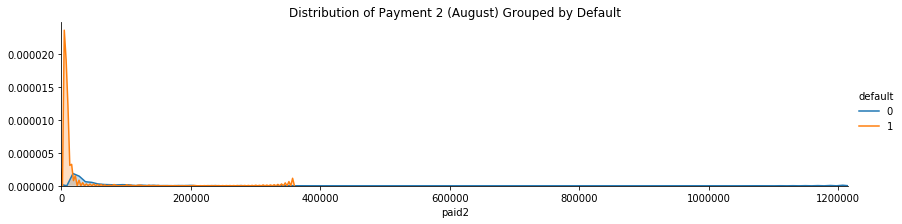

In [85]:
# Payment2 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'paid2', shade=True)
oldest = credit['paid2'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Payment 2 (August) Grouped by Default')
fig.add_legend()

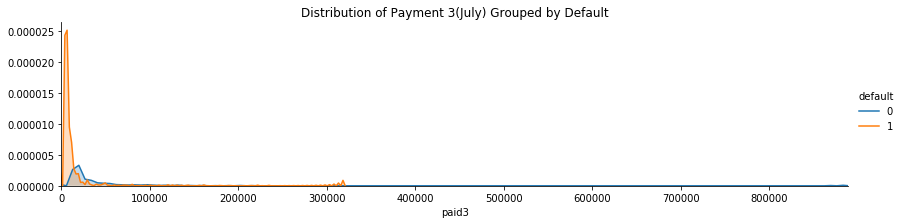

In [86]:
# Payment3 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'paid3', shade=True)
oldest = credit['paid3'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Payment 3(July) Grouped by Default')
fig.add_legend()

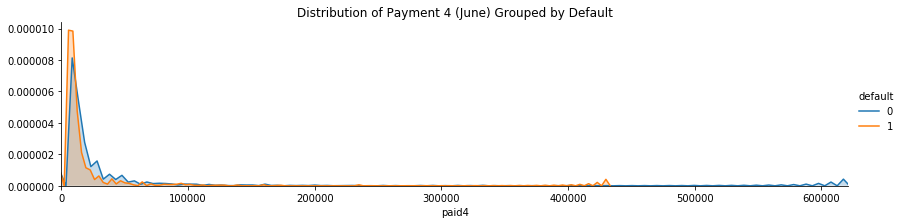

In [87]:
# Payment4 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'paid4', shade=True)
oldest = credit['paid4'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Payment 4 (June) Grouped by Default')
fig.add_legend()

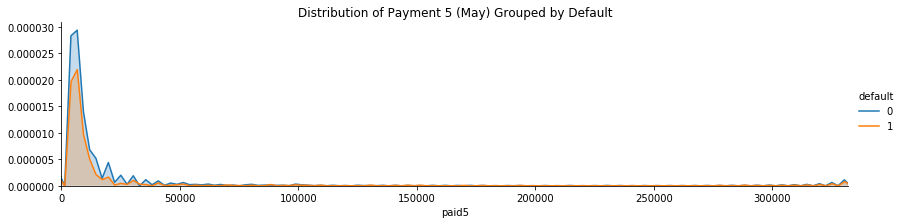

In [88]:
# Payment5 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'paid5', shade=True)
oldest = credit['paid5'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Payment 5 (May) Grouped by Default')
fig.add_legend()

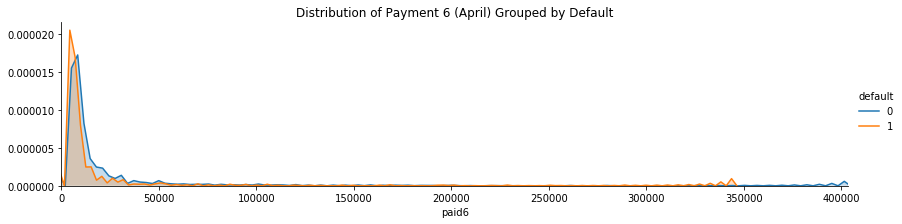

In [100]:
# Payment6 vs Default
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'paid6', shade=True)
oldest = credit['paid6'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Payment 6 (April) Grouped by Default')
fig.add_legend()

There is a lot more disparity with payment amount and default than with bill amount and default. This makes sense intuitively since payment amount is controlled by the customer and therefore more indicative of their behavior. 

There are also few payments above 100,000. We should remove payments above 100,000. Per the IQR test, these are outliers but we can more confidently see this here as wel. 

### 4A.2) Categorical Predictors vs Target Variable

 - Categorial vs Categorical
     - Sex vs Default
     - Education vs Default
     - Marriage vs Default
     - Pay Histories vs Default


#### 4A.2.1) Sex vs Default

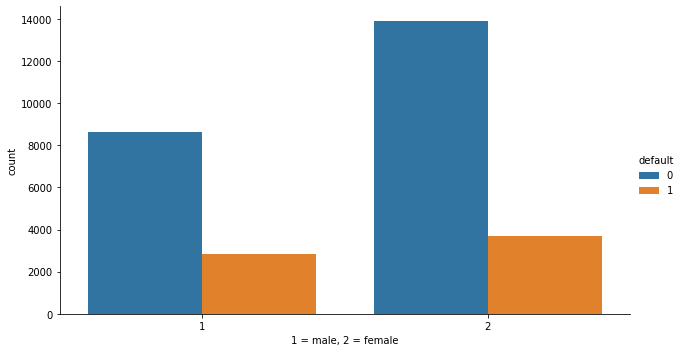

In [73]:
# Sex vs Default Chart
fg_sexdefault = sns.catplot('sex', data=credit, hue='default', kind='count', aspect=1.75)
fg_sexdefault.set_xlabels('1 = male, 2 = female')

In [71]:
# sex and default counts
credit.groupby(['sex', 'default'])['sex'].count()


sex  default
1    0           8645
     1           2824
2    0          13895
     1           3708
Name: sex, dtype: int64

The percentage of men who defaulted is much larger than the percentage of woman who defaulted.

There is less of a disparaty between males and females that defaulted than in the 'did not default' group. 

Because of this, I suspect that being male may play more of a role in defaulting.

#### 4A.2.2) Education vs Default

In [103]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29072 entries, 0 to 29999
Data columns (total 25 columns):
id          29072 non-null int64
limit       29072 non-null int64
sex         29072 non-null category
edu         29072 non-null category
marriage    29072 non-null category
age         29072 non-null int64
pay1        29072 non-null category
pay2        29072 non-null category
pay3        29072 non-null category
pay4        29072 non-null category
pay5        29072 non-null category
pay6        29072 non-null category
bill1       29072 non-null int64
bill2       29072 non-null int64
bill3       29072 non-null int64
bill4       29072 non-null int64
bill5       29072 non-null int64
bill6       29072 non-null int64
paid1       29072 non-null int64
paid2       29072 non-null int64
paid3       29072 non-null int64
paid4       29072 non-null int64
paid5       29072 non-null int64
paid6       29072 non-null int64
default     29072 non-null category
dtypes: category(10), int64(15)
memo

In [122]:
edu_ticks = credit.edu.unique()


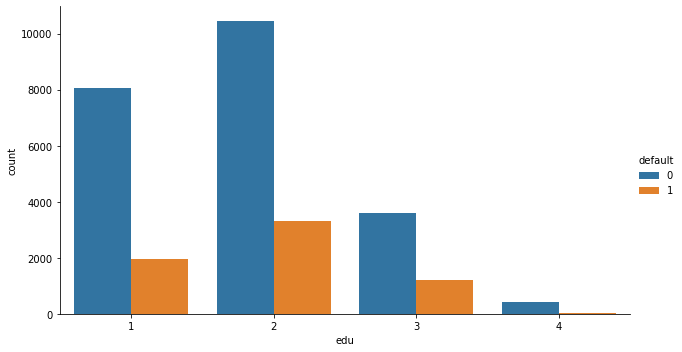

In [124]:
# Education vs Default 
fg_edudefault = sns.catplot('edu', data=credit, hue='default', kind='count', aspect=1.75)
#fg_edudefault.set_xlabels(edu_ticks,('1 = graduate', '2 = university', '3 = highschool', '4 = other') # not working, fix later

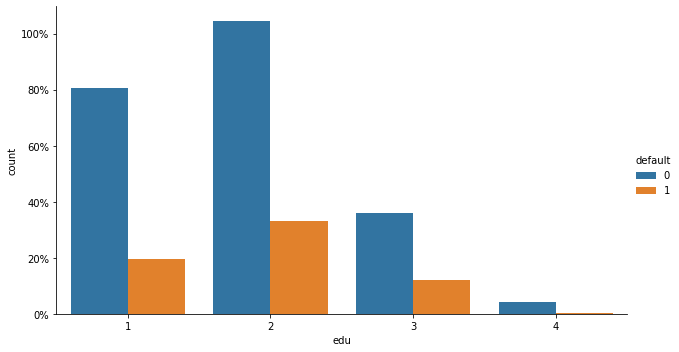

In [119]:
# Note to self: Improve with stacked bar chart, 4 bars for 4 edu levels, y-axis is percentage, and stacked by default or
# not default so we can better visualize default ratios in edu levels



# Education vs Default, as percentages
#fg_edudefault = sns.catplot('edu', data=credit, hue='default', kind='count', aspect=1.75)
#for ax in fg_edudefault.axes.flat:
#    ax.yaxis.set_major_formatter(PercentFormatter(xmax=10000))
#plt.show()

# Source: https://stackoverflow.com/questions/52512790/python-seaborn-catplot-how-do-i-change-the-y-axis-scale-to-percentage

In [173]:
# Group credit by 'edu' and 'default'
by_edu_default = credit.groupby(['edu','default'])
# Aggregate 'default' column of by_edu_default by count
count_by_edu_default = by_edu_default['default'].count()

print(count_by_edu_default)


edu  default
1    0           8055
     1           1970
2    0          10451
     1           3306
3    0           3610
     1           1224
4    0            424
     1             32
Name: default, dtype: int64


In [182]:
# edu and default counts
eduDefault_DF = credit[['edu','default']]
eduDefault_DF['total']= credit.groupby(['edu', 'default'])['edu'].count()

TypeError: incompatible index of inserted column with frame index

In [180]:
eduDefault_DF

,edu,default
0,2,1
1,2,1
2,2,0
3,2,0
4,2,0
...,...,...
29995,3,0
29996,3,0
29997,2,1
29998,3,1


               edu
edu default       
1   0         8055
    1         1970
2   0        10451
    1         3306
3   0         3610
    1         1224
4   0          424
    1           32
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, (1, 0) to (4, 1)
Data columns (total 1 columns):
edu    8 non-null int64
dtypes: int64(1)
memory usage: 530.0 bytes


In [174]:
# Let's look at percentages. 
my_tab = pd.crosstab(index=credit["edu"],  # Make a crosstab
                              columns="Count")      # Name the count column
my_tab_percent = my_tab/my_tab.sum()
my_tab
my_tab_percent 
my_tab


col_0,Count
edu,
1,10025
2,13757
3,4834
4,456


#### 4A.2.3) Marriage vs Default

In [ ]:
# 3. Marriage vs Default Chart
fg_edudefault = sns.catplot('default', data=credit, hue='edu', kind='count', aspect=1.75)
fg_edudefault.set_xlabels('0 = did not default, 1 = defaulted')

Married, Single, Divorced, Other

Divorced and other people are minimially present in the defaulted group. The ratio of married to single is almost equal in the default group. Therefore, I do not think that being marital status plays a significant role in predicting whether a customer will default.

In [ ]:
# marriage and default chart
fg_marriagedefault = sns.catplot('default', data=credit, hue='marriage', kind='count', aspect=1.75)
fg_marriagedefault.set_xlabels('0 = did not default, 1 = defaulted')

In [ ]:
# marriage and default counts
credit.groupby(['marriage', 'default'])['marriage'].count()

#### 4A.2.4)Payment Histories vs Default

### 4A.3 Remove Outliers based on Bivariate Distributions

<span style="color:red"> Notes from removing outliers based on univariate distributions are included. Notes from bivariate analysis are included in red.  </span>

### Continuous
- Remove limit balances above 500,000
- Consider removing ages above 60 if we need to improve model performance
- Consider removing bill amounts. These are the IQR results for bill amounts (bill1 to bill6):

   - Q1: 3405.0 Q3: 64365.0 IQR: 60960.0 lowOutliers: 88035.0 highOutliers: 155805.0
   - Q1: 2849.0 Q3: 60549.0 IQR: 57700.0 lowOutliers: 83701.0 highOutliers: 147099.0
   - Q1: 2493.0 Q3: 56374.5 IQR: 53881.5 lowOutliers: 78329.25 highOutliers: 137196.75
   - Q1: 2141.5 Q3: 50202.0 IQR: 48060.5 lowOutliers: 69949.25 highOutliers: 122292.75
   - Q1: 1600.5 Q3: 47776.5 IQR: 46176.0 lowOutliers: 67663.5 highOutliers: 117040.5
   - Q1: 1105.0 Q3: 46254.5 IQR: 45149.5 lowOutliers: 66619.25 highOutliers: 113978.75

- Consider removing paid amounts. These are the IQR results for paid amounts (paid1 to paid6):

    - Q1: 892.5 Q3: 5000.0 IQR: 4107.5 lowOutliers: 5268.75 highOutliers: 11161.25
    - Q1: 773.5 Q3: 4900.0 IQR: 4126.5 lowOutliers: 5416.25 highOutliers: 11089.75
    - Q1: 390.0 Q3: 4087.0 IQR: 3697.0 lowOutliers: 5155.5 highOutliers: 9632.5
    - Q1: 240.0 Q3: 3854.0 IQR: 3614.0 lowOutliers: 5181.0 highOutliers: 9275.0
    - Q1: 188.5 Q3: 3861.5 IQR: 3673.0 lowOutliers: 5321.0 highOutliers: 9371.0
    - Q1: 5.0 Q3: 3697.0 IQR: 3692.0 lowOutliers: 5533.0 highOutliers: 9235.0
    
    <span style="color:red"> After plotting paid amounts vs default, I am more confident removing outliers above 100,000 for this paid amounts.  </span>
    
    
### Categorical

I am not touching categorical outiers right now. If we need to improve the model, we will attempt this. 

## 4B) Other Relationships: Categorical vs Categorical 


In [ ]:
# Default grouped by edu, sex, marriage

default_edu_sex_marriage_table = pd.crosstab(index=[credit.default, credit.edu, credit.marriage], columns=[credit.sex])
default_edu_sex_marriage_table.unstack()


In [ ]:
# Lets do a factorplot of default, splitted by marriage and education level
sns.catplot('default', data=credit, kind='count', hue='marriage', col = 'edu', order=[0,1], 
               hue_order=[0,1,2,3], aspect=2)

## 4C) Other Relationships: Categorical vs Continuous 

In [ ]:
# Age by gender

fig = sns.FacetGrid(credit, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = credit['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

## 4D) Other Relationships: Continuous vs Continuous 

# Techniques for Addressing Class Imbalances

- Accuracy Paradox: If our model simply predicts that our customers won't default, than, it will be right most of the time since majority of our data consists of customers who did not default (22,000 compared to about 7,000). We will need to explore performance metrics in addition to accuracy:
    - confusion matrix, precision, recall, f1-score
    - kappa, roc curves
- resampling dataset
    - Sampling with Replacement: We will add copies of instances from the default class.
        - Depending on time constraints, we can try the Synthetic Minority Over-sampling Technique
    - Undersampling: Delete instances from the did not default class. 
- we will favor decision tree algorithms, which do well with class imbalances


Source: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [ ]:
# No Missing Values
credit_isna = pd.isna(credit)
credit_isna.sum()